In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True)
plt.rcParams['figure.figsize'] = [11.69, 8.27]
plt.rcParams['font.size'] = 17

Inputs

In [20]:
# select time span and number of simulations

# maturity of the option (in years)
T = 1/2
# m number of monitoring dates, write int if need to divide (int(360/4))
M = int(360/2)
# discretization time
dt = T/M
# number of simulation
N = 300000
# list of discretization dates, tao
tao = np.linspace(0,T,M) 

# ir vriables

r0 = -0.00732515
kappa = 0.0271933
theta = 0.06032162
sigma_ir = 0.0118128

# stock variables

S0 = 100
sigma_stock = 0.1
ir_correlation = 0.05

# option settings

# strike price K
K = 100
# select option type, "Call" or "Put"
option = "Call"
# payoff, "Vanilla" or "Asian"
payoff = "Asian"

# antithetic variates variance reduction ("on" or "off")

antithetic_variates = "off"

Monte Carlo Simulation Matrixes

In [3]:
# monte carlo shock simulation matrixes

# fix seed to replicate results

# without antithetic variate, just generate a random matrix of standard
# random variables (M,N)

if antithetic_variates == "off":
    
    np.random.seed(23)
    mc_ir = np.random.standard_normal((M,N))
    
    np.random.seed(32)
    mc_stock = np.random.standard_normal((M,N))
    
# with antithetic variates, generate a matrix (M, 2N): the first half as before,
# and for the second half replicate the first one with the (-) sign
    
if antithetic_variates == "on":
    
    np.random.seed(23)
    mc_ir = np.zeros((M,int(N*2)))
    mc_ir[:,:N] = np.random.standard_normal((M,N))
    mc_ir[:,N:] = -mc_ir[:,:N]
    
    np.random.seed(32)
    mc_stock = np.zeros((M,int(N*2)))
    mc_stock[:,:N] = np.random.standard_normal((M,N))
    mc_stock[:,N:] = -mc_stock[:,:N]

mc_ir

array([[ 0.66698806,  0.02581308, -0.77761941, ..., -0.1950871 ,
        -0.4142174 , -1.76812149],
       [ 0.4393914 ,  0.37376944,  0.50517765, ..., -0.054432  ,
         1.38186964, -1.09211288],
       [ 0.14788445, -0.92763656, -1.32978954, ..., -0.19841926,
         2.62936451,  0.1616267 ],
       ...,
       [ 0.02409577,  0.34327042,  0.16267792, ..., -0.33925955,
         0.67095742,  0.08340144],
       [ 1.34447829, -0.96972243,  0.29012066, ...,  0.11556023,
         1.99939873,  0.58214725],
       [ 1.29084455,  0.18426966, -0.54596226, ..., -0.91999776,
        -1.61218343, -1.03517756]])

Interest rate simulations

In [4]:
# initialize ir variables

if antithetic_variates == "off":
    
    interest_rates = np.zeros((M,N))
    interest_rates[0,:] = r0
    
if antithetic_variates == "on":
    
    interest_rates = np.zeros((M,N*2))
    interest_rates[0,:] = r0
    
interest_rates

array([[-0.00732515, -0.00732515, -0.00732515, ..., -0.00732515,
        -0.00732515, -0.00732515],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [5]:
if antithetic_variates == "off":
    for i in range(0,N):
        for j in (range(1,M)):
            interest_rates[j,i] = interest_rates[j-1,i]\
                                 + kappa*(theta - interest_rates[j-1,i])* dt\
                                 + sigma_ir* np.sqrt(dt) * mc_ir[j,i]
            
if antithetic_variates == "on":
    for i in range(0,N*2):
        for j in (range(1,M)):
            interest_rates[j,i] = interest_rates[j-1,i]\
                                 + kappa*(theta - interest_rates[j-1,i])* dt\
                                 + sigma_ir* np.sqrt(dt) * mc_ir[j,i]
    
    
interest_rates

array([[-0.00732515, -0.00732515, -0.00732515, ..., -0.00732515,
        -0.00732515, -0.00732515],
       [-0.00704648, -0.00708734, -0.00700552, ..., -0.00735393,
        -0.0064597 , -0.00799998],
       [-0.00694932, -0.00765978, -0.00782835, ..., -0.00747235,
        -0.00481764, -0.00789419],
       ...,
       [-0.0145207 , -0.02203679, -0.00459779, ..., -0.02169177,
        -0.00804035, -0.00893666],
       [-0.01367799, -0.02263431, -0.00441226, ..., -0.02161363,
        -0.00679038, -0.00856899],
       [-0.01286873, -0.02251332, -0.00474728, ..., -0.02218022,
        -0.00778904, -0.00920827]])

In [6]:
# initialize interest-rate curve

if antithetic_variates == "off":
    
    interest_rate_curve = np.zeros((M,N))
    interest_rate_curve[0,:] = r0 * dt
    
if antithetic_variates == "on":
    interest_rate_curve = np.zeros((M,N*2))
    interest_rate_curve[0,:] = r0 * dt

interest_rate_curve

array([[-0.00002035, -0.00002035, -0.00002035, ..., -0.00002035,
        -0.00002035, -0.00002035],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [7]:
if antithetic_variates == "off":
    for i in range(0,N):
        for j in (range(1,M)):
            interest_rate_curve[j,i] = interest_rate_curve[j-1,i]\
                                        + interest_rates[j,i] * dt
            
if antithetic_variates == "on":
    for i in range(0,N*2):
        for j in (range(1,M)):
            interest_rate_curve[j,i] = interest_rate_curve[j-1,i]\
                                        + interest_rates[j,i] * dt

interest_rate_curve

array([[-0.00002035, -0.00002035, -0.00002035, ..., -0.00002035,
        -0.00002035, -0.00002035],
       [-0.00003992, -0.00004003, -0.00003981, ..., -0.00004078,
        -0.00003829, -0.00004257],
       [-0.00005922, -0.00006131, -0.00006155, ..., -0.00006153,
        -0.00005167, -0.0000645 ],
       ...,
       [-0.00472321, -0.00791534, -0.00332655, ..., -0.00713503,
        -0.00235911, -0.00494943],
       [-0.00476121, -0.00797822, -0.0033388 , ..., -0.00719507,
        -0.00237798, -0.00497323],
       [-0.00479695, -0.00804075, -0.00335199, ..., -0.00725668,
        -0.00239961, -0.00499881]])

Stock price simulations

In [8]:
#initialize stock variables

if antithetic_variates == "off":
    
    stock_prices = np.zeros((M,N))
    stock_prices[0,:] = S0
    
if antithetic_variates == "on":
    stock_prices = np.zeros((M,N*2))
    stock_prices[0,:] = S0

stock_prices

array([[100., 100., 100., ..., 100., 100., 100.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       ...,
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.]])

In [9]:
if antithetic_variates == "off":
    for i in range(0,N):
        for j in (range(1,M)):
            stock_prices[j,i] = stock_prices[j-1,i] * np.exp(\
                                (interest_rates[j-1,i] - sigma_stock**2 / 2)\
                                * dt + sigma_stock * np.sqrt(dt)\
                                * (ir_correlation * mc_ir[j,i] + np.sqrt(1
                                - ir_correlation**2) * mc_stock[j,i]))
    
if antithetic_variates == "on":
     for i in range(0,N*2):
        for j in (range(1,M)):
            stock_prices[j,i] = stock_prices[j-1,i] * np.exp(\
                                (interest_rates[j-1,i] - sigma_stock**2 / 2)\
                                * dt + sigma_stock * np.sqrt(dt)\
                                * (ir_correlation * mc_ir[j,i] + np.sqrt(1\
                                - ir_correlation**2) * mc_stock[j,i]))
stock_prices

array([[100.        , 100.        , 100.        , ..., 100.        ,
        100.        , 100.        ],
       [100.83951917,  99.3544254 , 100.5842391 , ..., 100.18381399,
         99.91342444,  99.60233634],
       [100.64611267,  99.38618392, 100.30230114, ..., 100.22937957,
         99.55303434,  99.47859601],
       ...,
       [ 99.78977721,  88.38803651, 100.06291566, ...,  94.47163721,
        107.39066851,  94.97661452],
       [ 99.29518308,  87.99177983,  99.6913647 , ...,  95.51250665,
        107.00099985,  95.51370339],
       [ 99.20569223,  87.77205515,  99.26192286, ...,  96.01090771,
        106.96647271,  95.81815969]])

Payoff

In [10]:
#payoff of the option

if payoff == "Asian":
    
    if antithetic_variates == "off":
        disc_payoff = np.zeros(N)
        if option == "Call":
            for i in range(0,N):
                if stock_prices[:,i].mean() - K > 0.:
                    disc_payoff[i] =  (stock_prices[:,i].mean() - K) *\
                    np.exp((-interest_rate_curve[-1,i]))

        if option == "Put":
            for i in range(0,N):
                if K - stock_prices[:,i].mean() > 0.:
                    disc_payoff[i] =  (K - stock_prices[:,i].mean()) *\
                    np.exp((-interest_rate_curve[-1,i]))

    if antithetic_variates == "on":
        disc_payoff = np.zeros(N*2)

        if option == "Call":
            for i in range(0,N*2):
                if stock_prices[:,i].mean() - K > 0.:
                    disc_payoff[i] =  (stock_prices[:,i].mean() - K) *\
                    np.exp((-interest_rate_curve[-1,i]))

        if option == "Put":
            for i in range(0,N*2):
                if K - stock_prices[:,i].mean() > 0.:
                    disc_payoff[i] =  (K - stock_prices[:,i].mean()) *\
                    np.exp((-interest_rate_curve[-1,i]))

        new_disc_payoff = np.zeros(N)
        for i in range(0,N):
            new_disc_payoff[i] = (disc_payoff[i] + disc_payoff[i+N])/2

        disc_payoff = new_disc_payoff
        
if payoff == "Vanilla":
    
    if antithetic_variates == "off":
        disc_payoff = np.zeros(N)

        if option == "Call":
            for i in range(0,N):
                if stock_prices[-1,i] - K > 0.:
                    disc_payoff[i] =  (stock_prices[-1,i] - K) *\
                    np.exp((-interest_rate_curve[-1,i]))

        if option == "Put":
            for i in range(0,N):
                if K - stock_prices[-1,i] > 0.:
                    disc_payoff[i] =  (K - stock_prices[-1,i]) *\
                    np.exp((-interest_rate_curve[-1,i]))


    if antithetic_variates == "on":
        disc_payoff = np.zeros(N*2)

        if option == "Call":
            for i in range(0,N*2):
                if stock_prices[-1,i] - K > 0.:
                    disc_payoff[i] =  (stock_prices[-1,i] - K) *\
                    np.exp((-interest_rate_curve[-1,i]))

        if option == "Put":
            for i in range(0,N*2):
                if K - stock_prices[-1,i] > 0.:
                    disc_payoff[i] =  (K - stock_prices[-1,i]) *\
                    np.exp((-interest_rate_curve[-1,i]))

        new_disc_payoff = np.zeros(N)
        for i in range(0,N):
            new_disc_payoff[i] = (disc_payoff[i] + disc_payoff[i+N])/2

        disc_payoff = new_disc_payoff    

disc_payoff

array([0.97618648, 0.        , 0.        , ..., 0.        , 2.68912909,
       0.        ])

Results

In [23]:
price = disc_payoff.sum() / N

if antithetic_variates == "off":
    print("Using brute Monte Carlo,")

if antithetic_variates == "on":
    print("Using Antithetic Aariates,")

print("the price estimate of the "+str(payoff)+" "+str(option)+" Option is: "\
      +str(price)+" ,"+"\nits confidence interval is: ["+str(price - 1.96
        *disc_payoff.std()/N**0.5)+" ; "+str(price+1.96*disc_payoff.std()
                                              /N**0.5)+"]")

Using brute Monte Carlo,
the price estimate of the Asian Call Option is: 1.5367336081803222 ,
its confidence interval is: [1.5281968511948085 ; 1.545270365165836]


Plots

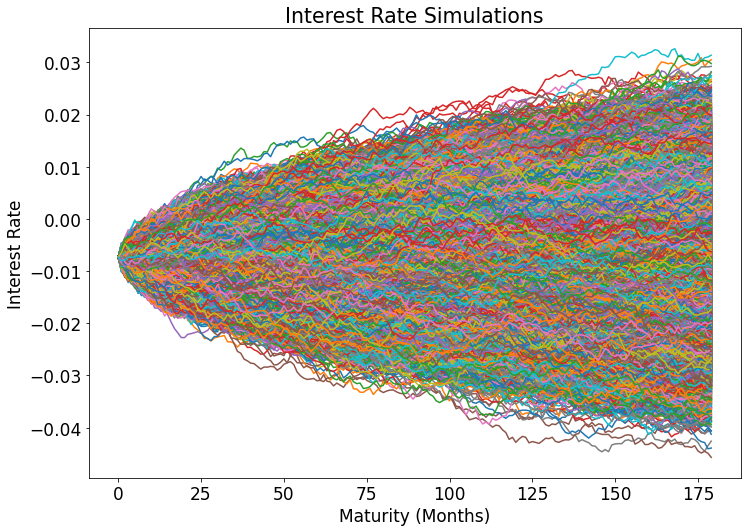

In [26]:
# Interest Rate Simulations (complete)

plt.title("Interest Rate Simulations")
plt.ylabel("Interest Rate")
plt.xlabel("Maturity (Months)")
for i in range(interest_rates.shape[1]):
    plt.plot(interest_rates[:,i])
    
#plt.savefig("Interest Rate Simulations complete", dpi = 1800)
plt.show()

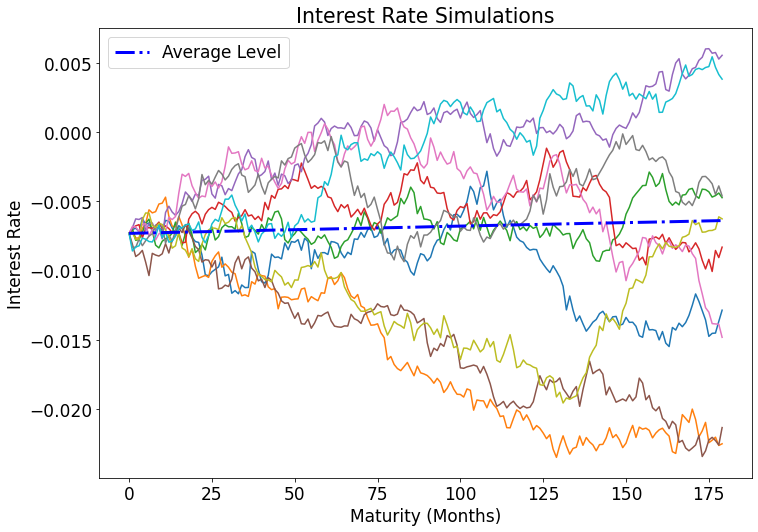

In [38]:
# Interest Rate Simulations (few)

plt.title("Interest Rate Simulations")
plt.ylabel("Interest Rate")
plt.xlabel("Maturity (Months)")
for i in range(0,10):    
    plt.plot(interest_rates[:,i])
plt.plot(interest_rates.mean(axis=1), color = "b", linewidth = 3,\
         linestyle = "-.", label = "Average Level")
plt.legend()
#plt.savefig("Interest Rate Simulations few", dpi = 1800)  
plt.show()

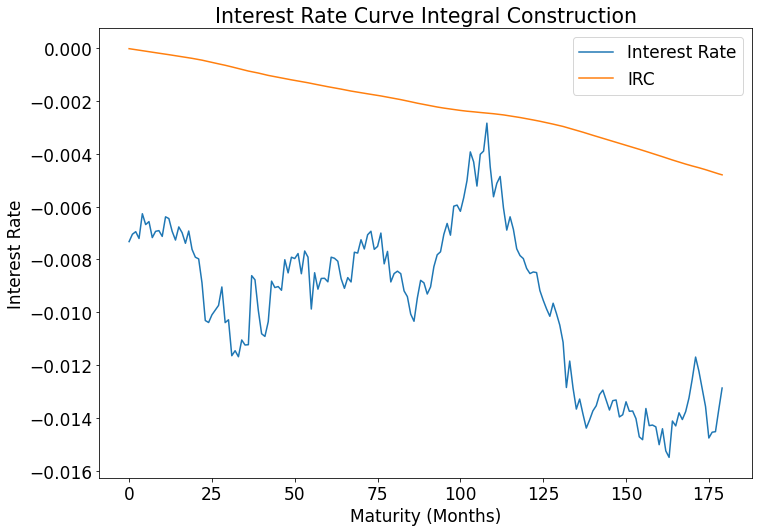

In [29]:
# Interest Rate Curve Integral Construction

plt.title("Interest Rate Curve Integral Construction")
plt.ylabel("Interest Rate")
plt.xlabel("Maturity (Months)")
plt.plot(interest_rates[:,0], label = "Interest Rate")
plt.plot(interest_rate_curve[:,0], label = "IRC")
plt.legend()
#plt.savefig("Interest Rate Curve Integral Construction", dpi = 1800)
plt.show()

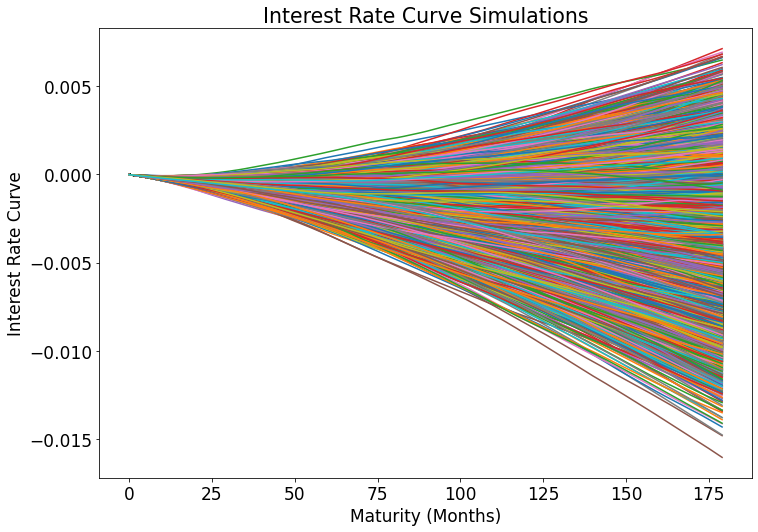

In [36]:
# Interest Rate Curve Simulations

plt.title("Interest Rate Curve Simulations")
plt.ylabel("Interest Rate Curve")
plt.xlabel("Maturity (Months)")
for i in range(interest_rate_curve.shape[1]):
    plt.plot(interest_rate_curve[:,i])
#plt.savefig("Interest Rate Curve Simulations", dpi = 1800)
plt.show()

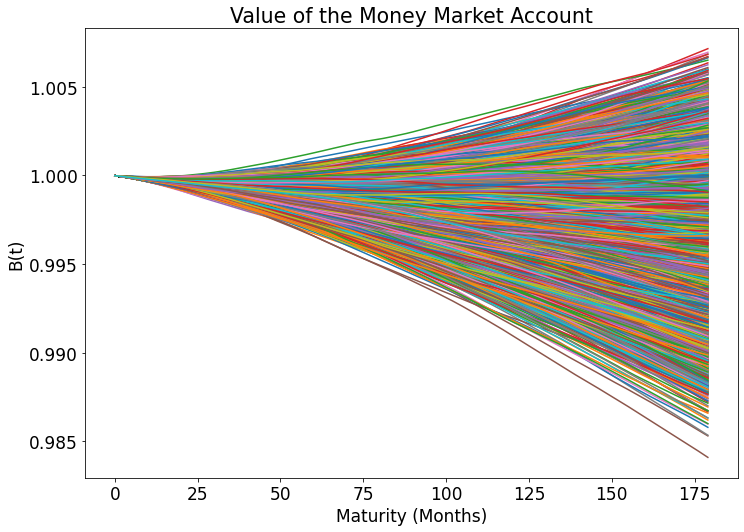

In [39]:
# Value of B(t), money market account

plt.title("Value of the Money Market Account")
plt.ylabel("B(t)")
plt.xlabel("Maturity (Months)")
for i in range(interest_rate_curve.shape[1]):
    plt.plot(np.exp(interest_rate_curve[:,i]))
#plt.savefig("Money Market Account Simulations", dpi = 1800)      
plt.show()

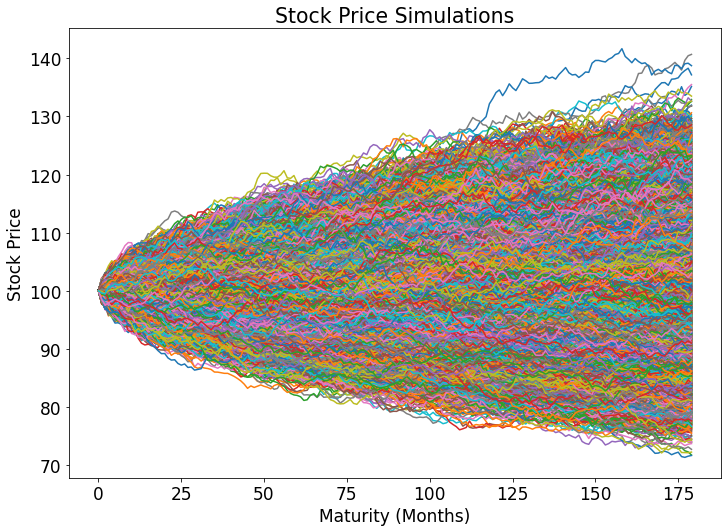

In [40]:
# Stock Price Simulations (complete)

plt.title("Stock Price Simulations")
plt.ylabel("Stock Price")
plt.xlabel("Maturity (Months)")
for i in range(stock_prices.shape[1]):
    plt.plot(stock_prices[:,i])
#plt.savefig("Stock Price Simulations complete", dpi = 1800)     
plt.show()

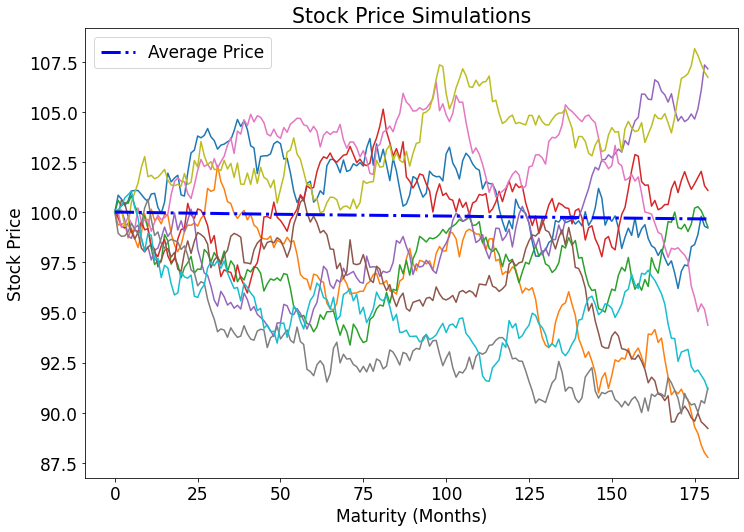

In [30]:
# Stock Price Simulations (few)

plt.title("Stock Price Simulations")
plt.ylabel("Stock Price")
plt.xlabel("Maturity (Months)")
for i in range(0,10):
    plt.plot(stock_prices[:,i])
plt.plot(stock_prices.mean(axis=1), color = "b", linewidth = 3,\
         linestyle = "-.", label = "Average Price")
plt.legend()
#plt.savefig("Stock Price Simulations few", dpi = 1800)    
plt.show()